In [1]:
import numpy as np
import sep
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline
from matplotlib import rcParams

rcParams['figure.figsize'] = [10. , 8.]

In [2]:
green = fits.getdata('hlsp_hudf12_hst_wfc3ir_udfmain_f125w_v1.0_drz.fits')
green = green.byteswap(inplace=True).newbyteorder()
red = fits.getdata('hlsp_hudf12_hst_wfc3ir_udfmain_f160w_v1.0_drz.fits')
red = red.byteswap(inplace=True).newbyteorder()
blue = fits.getdata('hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits')
blue = blue.byteswap(inplace=True).newbyteorder()

hdug = fits.open('hlsp_hudf12_hst_wfc3ir_udfmain_f125w_v1.0_drz.fits')
hdug.info()

Filename: hlsp_hudf12_hst_wfc3ir_udfmain_f125w_v1.0_drz.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     358   (3600, 3600)   float32   


C:\Users\zachd\Anaconda 2020\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
C:\Users\zachd\Anaconda 2020\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


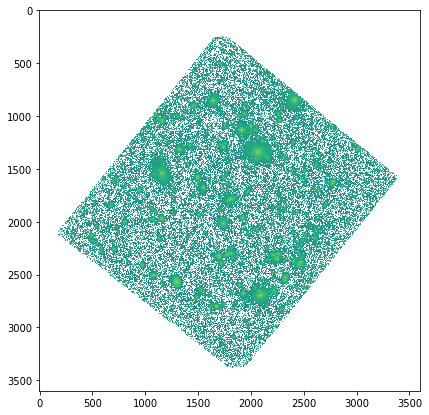

In [3]:
dg_log = np.log10(green)
f = plt.figure(figsize=(7,7))
plt.imshow(dg_log)

In [4]:
hsv_image = np.zeros((3600,3600,3))

#everything after this is pretty spitballed, im trying to scale everything to green here by using the same scaling methods for
#s and v but manually setting h to some value of green

mg , sg = np.mean(green) , np.std(green)

mg_min = mg.min()
mg_max = mg.max()

sg_min = sg.min()
sg_max = sg.max()

vg = (mg - mg_min) / (mg_max-mg_min)
s = 1.0 - vg

h = 0.6

#0.8 - 0.2 * (sg-sg_min) / (sg_max-sg_min)
#will most likely be using a scheme similar to ^ but using a placeholder value to test things


hsv_image[:,:,0] = h
hsv_image[:,:,1] = s
hsv_image[:,:,2] = vg



new_im = colors.rgb_to_hsv(hsv_image)

C:\Users\zachd\Anaconda 2020\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in float_scalars
  
C:\Users\zachd\Anaconda 2020\lib\site-packages\matplotlib\colors.py:1420: RuntimeWarning: invalid value encountered in greater
  ipos = arr_max > 0
C:\Users\zachd\Anaconda 2020\lib\site-packages\matplotlib\colors.py:1424: RuntimeWarning: invalid value encountered in greater
  ipos = delta > 0


In [ ]:
f = plt.figure(figsize=(7,7))
plt.imshow(new_im)